In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [58]:
data_2020 = pd.read_csv('Datasets/flujo-vehicular-2020.csv', sep =',')

In [76]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         int32  
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       object 
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(3), int32(1), object(9)
memory usage: 241.6+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020,2020-01-01 00:00:00,01,Miércoles,01,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020,2020-01-01 00:00:00,01,Miércoles,01,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020,2020-01-01 00:00:00,01,Miércoles,01,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020,2020-01-01 00:00:00,01,Miércoles,01,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020,2020-01-01 00:00:00,01,Miércoles,01,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [78]:
data_2020.sample()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
1916157,2020,2020-10-31,10,Sábado,31,13.0,14.0,AVELLANEDA,Auto,Efectivo,Efectivo,Centro,386.0


In [61]:
data_2020['periodo'] = data_2020['periodo'].astype(int)

In [62]:
data_2020['dia_fecha'] = data_2020['dia_fecha'].astype(int)

In [63]:
data_2020['dia_fecha'] = data_2020['dia_fecha'].astype(str)

In [64]:
print(data_2020['dia_fecha'].unique())

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31']


In [65]:
dias_numeros = {
    '1': '01',
    '2': '02',
    '3': '03',
    '4': '04',
    '5': '05',
    '6': '06',
    '7': '07',
    '8': '08',
    '9': '09',
    '10': '10',
    '11': '11',
    '12': '12',
    '13': '13',
    '14': '14',
    '15': '15',
    '16': '16',
    '17': '17',
    '18': '18',
    '19': '19',
    '20': '20',
    '21': '21',
    '22': '22',
    '23': '23',
    '24': '24',
    '25': '25',
    '26': '26',
    '27': '27',
    '28': '28',
    '29': '29',
    '30': '30',
    '31': '31'}

data_2020['dia_fecha'] = data_2020['dia_fecha'].map(dias_numeros)

In [66]:
meses_numeros = {
    'enero': '01',
    'febrero': '02',
    'marzo': '03',
    'abril': '04',
    'mayo': '05',
    'junio': '06',
    'julio': '07',
    'agosto': '08',
    'septiembre': '09',
    'octubre': '10',
    'noviembre': '11',
    'diciembre': '12'
}

data_2020['mes'] = data_2020['mes'].map(meses_numeros)

In [80]:
data_2020['fecha2'] = pd.to_datetime(data_2020['periodo'].astype(str) + '-' + data_2020['mes'] + '-' + data_2020['dia_fecha'], format='%Y-%m-%d')

In [82]:
data_2020.sample()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos,fecha2
915650,2020,2020-05-17,05,Domingo,17,19.0,20.0,ILP,Pesados 2 Ejes,Violación,Violación - Normal,Centro,2.0,2020-05-17


In [84]:
data_2020['hora_fin'] = data_2020['hora_fin'].astype(int)

In [86]:
data_2020['fecha3'] = pd.to_datetime(data_2020.fecha2) + pd.to_timedelta(data_2020.hora_fin, unit = 'h')

In [88]:
data_2020.sample()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos,fecha2,fecha3
684811,2020,2020-04-02,04,Jueves,02,2.0,3,ILLIA,N/D,Violación,Violación - Normal,Provincia,16.0,2020-04-02,2020-04-02 03:00:00


In [90]:
data_2020['cantidad_pasos'] = data_2020['cantidad_pasos'].astype(int)

In [92]:
data_2020.drop(columns = ['periodo','fecha','mes', 'dia_fecha', 'hora_inicio', 'hora_fin', 'tipo_vehiculo', 'observacion', 'fecha2'], inplace = True)

In [94]:
data_2020.sample()

,dia,estacion,forma_pago,sentido,cantidad_pasos,fecha3
2365372,Viernes,AVELLANEDA,Tag,Centro,0,2020-12-11 03:00:00


In [96]:
data_2020.rename(columns={'fecha3': 'fecha'}, inplace=True)

In [98]:
data_2020.drop(columns = ['dia','sentido'], inplace = True)

In [100]:
print(data_2020['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']


In [102]:
print(data_2020['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']


In [204]:
data_2021 = pd.read_csv('Datasets/flujo-vehicular-2021.csv', sep =',')

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_2124\788470433.py:1: DtypeWarning: Columns (0,2,3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2021 = pd.read_csv('Datasets/flujo-vehicular-2021.csv', sep =',')


In [236]:
data_2021.info()
data_2021.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3029354 entries, 0 to 3029365
Data columns (total 10 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Año de Fecha Operativa  int32 
 1   Cat Cobrada             object
 2   Día de Fecha Operativa  int32 
 3   Hora HH                 object
 4   ID Peaje                object
 5   Mes de Fecha Operativa  object
 6   Observacion             object
 7   Sentido                 object
 8   Tipo Cobro              object
 9   Pasos                   object
dtypes: int32(2), object(8)
memory usage: 231.1+ MB


,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
0,2021,Auto,1,0,ALB,04,Efectivo,Provincia,Efectivo,7
1,2021,Auto,1,0,ALB,04,Mercado Pago,Provincia,Mercado Pago,4
2,2021,Auto,1,0,ALB,04,Mercado Pago OCR,Centro,Mercado Pago,1
3,2021,Auto,1,0,ALB,04,Paso en infracción con Multa LPR,Provincia,Rec.Deuda,1
4,2021,Auto,1,0,ALB,04,Tag - PosPago,Centro,Tag,19


In [206]:
data_2021.sample()

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
2897970,2021,Pesados 2 Ejes,1,1,ILP,diciembre,Tag - PosPago OCR,Centro,Tag,1


In [216]:
data_2021.tail()

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
3029361,2021,N/D,21,15,DEC,12,Violación - Vía Cerrada,Centro,Violación,2330
3029362,2021,N/D,21,15,DEL,12,Violación - Vía Cerrada,Provincia,Violación,1969
3029363,2021,N/D,21,15,ILL,12,Violación - Normal,Centro,Violación,3
3029364,2021,N/D,21,15,ILL,12,Violación - Vía Cerrada,Centro,Violación,2445
3029365,2021,N/D,21,15,ILL,12,Violación - Vía Cerrada,Provincia,Violación,3880


In [218]:
data_2021 = data_2021[data_2021['Mes de Fecha Operativa'] != 'Total']

In [223]:
print(data_2021['Año de Fecha Operativa'].unique())

[2021]


In [222]:
data_2021['Año de Fecha Operativa'] = data_2021['Año de Fecha Operativa'].astype(str).str.replace("'", "").astype(int)

In [190]:
print(data_2021['Mes de Fecha Operativa'].unique())

['04' '03' '05' '02' '01' '06' '07' '08' '09' '10' '11' '12']


In [214]:
meses_numeros = {
    'enero': '01',
    'febrero': '02',
    'marzo': '03',
    'abril': '04',
    'mayo': '05',
    'junio': '06',
    'julio': '07',
    'agosto': '08',
    'septiembre': '09',
    'octubre': '10',
    'noviembre': '11',
    'diciembre': '12'
}

data_2021['Mes de Fecha Operativa'] = data_2021['Mes de Fecha Operativa'].map(meses_numeros)

In [244]:
print(data_2021['Día de Fecha Operativa'].unique())

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31']


In [238]:
data_2021['Día de Fecha Operativa'] = data_2021['Día de Fecha Operativa'].astype(str)

In [232]:
data_2021['Día de Fecha Operativa'] = data_2021['Día de Fecha Operativa'].astype(str).str.replace("'", "").astype(int)

In [242]:
dias_numeros = {
    '1': '01',
    '2': '02',
    '3': '03',
    '4': '04',
    '5': '05',
    '6': '06',
    '7': '07',
    '8': '08',
    '9': '09',
    '10': '10',
    '11': '11',
    '12': '12',
    '13': '13',
    '14': '14',
    '15': '15',
    '16': '16',
    '17': '17',
    '18': '18',
    '19': '19',
    '20': '20',
    '21': '21',
    '22': '22',
    '23': '23',
    '24': '24',
    '25': '25',
    '26': '26',
    '27': '27',
    '28': '28',
    '29': '29',
    '30': '30',
    '31': '31'}

data_2021['Día de Fecha Operativa'] = data_2021['Día de Fecha Operativa'].map(dias_numeros)

In [246]:
data_2021.sample()

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
1917543,2021,N/D,28,11,PB1,09,Violación - Normal,Provincia,Violación,88


In [248]:
data_2021['Hora HH'] = data_2021['Hora HH'].astype(int)

In [250]:
print(data_2021['Hora HH'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [252]:
data_2021['fecha2'] = pd.to_datetime(data_2021['Año de Fecha Operativa'].astype(str) + '-' + data_2021['Mes de Fecha Operativa'] + '-' + data_2021['Día de Fecha Operativa'], format='%Y-%m-%d')

In [253]:
data_2021.rename(columns={'Hora HH': 'hora'}, inplace=True)

In [256]:
data_2021['fecha'] = pd.to_datetime(data_2021.fecha2) + pd.to_timedelta(data_2021.hora, unit = 'h')

In [258]:
data_2021.sample()

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,hora,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos,fecha2,fecha
7809,2021,Auto,04,15,SAR,04,Tag - PosPago OCR,Provincia,Tag,6,2021-04-04,2021-04-04 15:00:00


In [260]:
data_2021.drop(columns = ['Año de Fecha Operativa','Cat Cobrada','Día de Fecha Operativa', 'hora', 'Mes de Fecha Operativa', 'Observacion', 'Sentido', 'fecha2'], inplace = True)

In [262]:
print(data_2021['ID Peaje'].unique())

['ALB' 'AVE' 'DEC' 'DEL' 'ILL' 'ILP' 'PB1' 'PB2' 'PB3' 'PB4' 'RET' 'SAL'
 'SAR']


In [264]:
estaciones = {
    'ALB': 'ALBERDI',
    'AVE': 'AVELLANEDA',
    'DEC': 'DELLEPIANE LINIERSLEPIANE CENTRO',
    'DEL': 'DELLEPIANE LINIERS',
    'ILL': 'ILLIA',
    'ILP': 'ILP',
    'PB1': 'PB1',
    'PB2': 'PB2',
    'PB3': 'PB3',
    'PB4': 'PB4',
    'RET': 'RETIRO',
    'SAL': 'SALGUERO',
    'SAR': 'SARMIENTO'
}

data_2021['ID Peaje'] = data_2021['ID Peaje'].map(estaciones)

In [266]:
print(data_2021['Tipo Cobro'].unique())

['Efectivo' 'Mercado Pago' 'Rec.Deuda' 'Tag' 'Exento' 'Tarjeta Magnética'
 'Violación' 'CPP']


In [268]:
data_2021['Pasos'] = data_2021['Pasos'].astype(int)

In [270]:
data_2021.rename(columns={'ID Peaje': 'estacion', 'Tipo Cobro':'forma_pago', 'Pasos':'cantidad_pasos'}, inplace=True)

In [272]:
data_2021.sample()

,estacion,forma_pago,cantidad_pasos,fecha
515372,ILLIA,Tag,31,2021-05-27 23:00:00


In [274]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029354 entries, 0 to 3029365
Data columns (total 4 columns):
 #   Column          Dtype         
---  ------          -----         
 0   estacion        object        
 1   forma_pago      object        
 2   cantidad_pasos  int32         
 3   fecha           datetime64[ns]
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 104.0+ MB


In [276]:
data_2020.sample()

,estacion,forma_pago,cantidad_pasos,fecha
2294954,DELLEPIANE LINIERSLEPIANE CENTRO,Tag,1,2020-11-29 07:00:00


In [278]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 4 columns):
 #   Column          Dtype         
---  ------          -----         
 0   estacion        object        
 1   forma_pago      object        
 2   cantidad_pasos  int32         
 3   fecha           datetime64[ns]
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 67.7+ MB


In [280]:
enerofebrero_2022 = pd.read_csv('Datasets/Transito Enero-Febrero 2022.csv', sep =';')

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_2124\2417547655.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  enerofebrero_2022 = pd.read_csv('Datasets/Transito Enero-Febrero 2022.csv', sep =';')


In [282]:
enerofebrero_2022.info()
enerofebrero_2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476196 entries, 0 to 476195
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año de Fecha Operativa  476196 non-null  object
 1   Cat Cobrada             476196 non-null  object
 2   Hora HH                 476196 non-null  object
 3   ID Peaje                476196 non-null  object
 4   Observacion             476196 non-null  object
 5   Sentido                 476196 non-null  object
 6   Tipo Cobro              476196 non-null  object
 7   Pasos                   476196 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 29.1+ MB


,Año de Fecha Operativa,Cat Cobrada,Hora HH,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos
0,2022-01-01,Auto,0,ALB,Mercado Pago,Provincia,Mercado Pago,8
1,2022-01-01,Auto,0,ALB,Mercado Pago OCR,Centro,Mercado Pago,4
2,2022-01-01,Auto,0,ALB,Mercado Pago OCR,Provincia,Mercado Pago,2
3,2022-01-01,Auto,0,ALB,Tag - PosPago,Provincia,Tag,65
4,2022-01-01,Auto,0,ALB,Tag - PosPago OCR,Centro,Tag,32


In [284]:
enerofebrero_2022['Año de Fecha Operativa'] = pd.to_datetime(enerofebrero_2022['Año de Fecha Operativa'], format='%Y-%m-%d')

In [286]:
print(enerofebrero_2022['Hora HH'].unique())

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 '7' '8' '9'
 '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '0'
 '1' '2' '3' '4' '5' '6' 'Auto' 'Auto con trailer' 'Moto' 'N/D'
 'Pago doble Moto' 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes'
 'Pesados 5 Ejes' 'Pesados 6 Ejes']


In [288]:
enerofebrero_2022['Hora HH'].value_counts()

Hora HH
Auto                69959
Pesados 2 Ejes      42720
Pesados 3 Ejes      23782
Pesados 5 Ejes      23232
Moto                18033
N/D                 15459
Pesados 6 Ejes      15306
Pesados 4 Ejes      13323
11                  10196
10                  10062
9                   10057
16                   9983
15                   9919
12                   9855
8                    9788
14                   9786
17                   9765
13                   9742
7                    9693
18                   9458
19                   8889
6                    8700
20                   8594
21                   7925
22                   7214
5                    7076
23                   6695
Auto con trailer     5937
0                    5103
1                    4889
4                    4581
2                    4452
3                    4186
Pago doble Moto      3381
11                   2484
10                   2478
12                   2418
17                   2390
9   

In [290]:
print(enerofebrero_2022['Cat Cobrada'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago doble Moto' 'Pesados 2 Ejes'
 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes' 'Pesados 6 Ejes' '0'
 '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
 17 18 19 20 21 22 23 0]


In [292]:
enerofebrero_2022['Hora HH'] = pd.to_numeric(enerofebrero_2022['Hora HH'], errors='coerce')

print(enerofebrero_2022['Hora HH'].unique())

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. nan]


In [293]:
enerofebrero_2022['Hora HH'].fillna(enerofebrero_2022['Cat Cobrada'], inplace=True)

In [296]:
enerofebrero_2022['Hora HH'].isna().sum()

0

In [298]:
enerofebrero_2022['Hora HH'] = enerofebrero_2022['Hora HH'].astype(int)

In [300]:
enerofebrero_2022.sample()

,Año de Fecha Operativa,Cat Cobrada,Hora HH,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos
28031,2022-01-13,Auto,5,RET,Tag - PosPago,Provincia,Tag,10


In [302]:
enerofebrero_2022.rename(columns={'Hora HH': 'hora'}, inplace=True)

In [304]:
enerofebrero_2022.rename(columns={'Año de Fecha Operativa': 'fecha2'}, inplace=True)

In [306]:
enerofebrero_2022['fecha'] = pd.to_datetime(enerofebrero_2022.fecha2) + pd.to_timedelta(enerofebrero_2022.hora, unit = 'h')

In [308]:
print(enerofebrero_2022['ID Peaje'].unique())

['ALB' 'AVE' 'DEC' 'DEL' 'ILL' 'ILP' 'PB1' 'PB2' 'PB4' 'RET' 'SAL' 'SAR'
 'PB3']


In [310]:
estaciones = {
    'ALB': 'ALBERDI',
    'AVE': 'AVELLANEDA',
    'DEC': 'DELLEPIANE LINIERSLEPIANE CENTRO',
    'DEL': 'DELLEPIANE LINIERS',
    'ILL': 'ILLIA',
    'ILP': 'ILP',
    'PB1': 'PB1',
    'PB2': 'PB2',
    'PB3': 'PB3',
    'PB4': 'PB4',
    'RET': 'RETIRO',
    'SAL': 'SALGUERO',
    'SAR': 'SARMIENTO'
}

enerofebrero_2022['ID Peaje'] = enerofebrero_2022['ID Peaje'].map(estaciones)

In [312]:
print(enerofebrero_2022['Tipo Cobro'].unique())

['Mercado Pago' 'Tag' 'Efectivo' 'Violación' 'CPP' 'Exento' 'Rec.Deuda'
 'Tarjeta Magnética']


In [314]:
enerofebrero_2022.sample()

,fecha2,Cat Cobrada,hora,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,fecha
432404,2022-02-17,7,7,ILP,Tag - PosPago,Provincia,Tag,27,2022-02-17 07:00:00


In [316]:
enerofebrero_2022.drop(columns = ['fecha2','Cat Cobrada','hora','Observacion', 'Sentido'], inplace = True)

In [318]:
enerofebrero_2022.rename(columns={'ID Peaje': 'estacion', 'Tipo Cobro':'forma_pago', 'Pasos':'cantidad_pasos'}, inplace=True)

In [320]:
marzo_2022 = pd.read_csv('Datasets/Transito Marzo 2022.csv', sep =',')

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_2124\2732369018.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  marzo_2022 = pd.read_csv('Datasets/Transito Marzo 2022.csv', sep =',')


In [321]:
marzo_2022.info()
marzo_2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263188 entries, 0 to 263187
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Año de Fecha Operativa  263188 non-null  object 
 1   Hora HH                 263188 non-null  object 
 2   Cat Cobrada             263188 non-null  object 
 3   ID Peaje                263188 non-null  object 
 4   Observacion             263188 non-null  object 
 5   Sentido                 263188 non-null  object 
 6   Tipo Cobro              263188 non-null  object 
 7   Pasos                   263188 non-null  float64
dtypes: float64(1), object(7)
memory usage: 16.1+ MB


,Año de Fecha Operativa,Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos
0,1/3/2022,0,Auto,ALB,Mercado Pago,Centro,Mercado Pago,5.0
1,1/3/2022,0,Auto,ALB,Mercado Pago,Provincia,Mercado Pago,7.0
2,1/3/2022,0,Auto,ALB,Mercado Pago OCR,Provincia,Mercado Pago,2.0
3,1/3/2022,0,Auto,ALB,Tag - PosPago,Centro,Tag,31.0
4,1/3/2022,0,Auto,ALB,Tag - PosPago,Provincia,Tag,90.0


In [324]:
marzo_2022 = marzo_2022[marzo_2022['Año de Fecha Operativa'] != 'Total general']

In [326]:
marzo_2022['Año de Fecha Operativa'] = pd.to_datetime(marzo_2022['Año de Fecha Operativa'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

In [328]:
print(marzo_2022['Hora HH'].unique())

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 '20' '21'
 '22' '23']


In [330]:
marzo_2022['Hora HH'] = marzo_2022['Hora HH'].astype(int)

In [332]:
marzo_2022['Pasos'] = marzo_2022['Pasos'].astype(int)

In [334]:
marzo_2022['Año de Fecha Operativa'] = pd.to_datetime(marzo_2022['Año de Fecha Operativa'], format='%Y-%m-%d')

In [336]:
print(marzo_2022['ID Peaje'].unique())

['ALB' 'AVE' 'DEC' 'DEL' 'ILL' 'ILP' 'PB1' 'PB2' 'PB3' 'PB4' 'RET' 'SAL'
 'SAR']


In [338]:
estaciones = {
    'ALB': 'ALBERDI',
    'AVE': 'AVELLANEDA',
    'DEC': 'DELLEPIANE LINIERSLEPIANE CENTRO',
    'DEL': 'DELLEPIANE LINIERS',
    'ILL': 'ILLIA',
    'ILP': 'ILP',
    'PB1': 'PB1',
    'PB2': 'PB2',
    'PB3': 'PB3',
    'PB4': 'PB4',
    'RET': 'RETIRO',
    'SAL': 'SALGUERO',
    'SAR': 'SARMIENTO'
}

marzo_2022['ID Peaje'] = marzo_2022['ID Peaje'].map(estaciones)

In [340]:
print(marzo_2022['Tipo Cobro'].unique())

['Mercado Pago' 'Tag' 'Violación' 'Efectivo' 'Exento' 'Rec.Deuda'
 'Tarjeta Magnética' 'CPP']


In [342]:
marzo_2022.rename(columns={'Hora HH': 'hora'}, inplace=True)

In [344]:
marzo_2022.rename(columns={'Año de Fecha Operativa': 'fecha2'}, inplace=True)

In [346]:
marzo_2022['fecha'] = pd.to_datetime(marzo_2022.fecha2) + pd.to_timedelta(marzo_2022.hora, unit = 'h')

In [348]:
marzo_2022.sample()

,fecha2,hora,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,fecha
44337,2022-03-06,10,Moto,ILLIA,Mercado Pago,Centro,Mercado Pago,1,2022-03-06 10:00:00


In [350]:
marzo_2022.drop(columns = ['fecha2','Cat Cobrada','hora','Observacion', 'Sentido'], inplace = True)

In [352]:
marzo_2022.rename(columns={'ID Peaje': 'estacion', 'Tipo Cobro':'forma_pago', 'Pasos':'cantidad_pasos'}, inplace=True)

In [354]:
abril_2022 = pd.read_csv('Datasets/Transito Abril 2022.csv', sep =',')

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_2124\462509645.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  abril_2022 = pd.read_csv('Datasets/Transito Abril 2022.csv', sep =',')


In [355]:
abril_2022.info()
abril_2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263187 entries, 0 to 263186
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año de Fecha Operativa  252037 non-null  object
 1   Hora HH                 252037 non-null  object
 2   Cat Cobrada             252037 non-null  object
 3   ID Peaje                252037 non-null  object
 4   Observacion             252037 non-null  object
 5   Sentido                 252037 non-null  object
 6   Tipo Cobro              252037 non-null  object
 7   Pasos                   252037 non-null  object
dtypes: object(8)
memory usage: 16.1+ MB


,Año de Fecha Operativa,Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos
0,1/4/2022,0,Auto,ALB,Mercado Pago,Centro,Mercado Pago,7.0
1,1/4/2022,0,Auto,ALB,Mercado Pago,Provincia,Mercado Pago,13.0
2,1/4/2022,0,Auto,ALB,Mercado Pago OCR,Centro,Mercado Pago,2.0
3,1/4/2022,0,Auto,ALB,Mercado Pago OCR,Provincia,Mercado Pago,6.0
4,1/4/2022,0,Auto,ALB,Tag - PosPago,Centro,Tag,52.0


In [358]:
abril_2022 = abril_2022[abril_2022['Año de Fecha Operativa'] != 'Total general']

In [360]:
abril_2022['Año de Fecha Operativa'] = pd.to_datetime(abril_2022['Año de Fecha Operativa'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

In [361]:
abril_2022 = abril_2022.dropna()

In [364]:
print(abril_2022['Hora HH'].unique())

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 '16' '17'
 '18' '19' '20' '21' '22' '23' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9'
 '10' '11' '12' '13' '14' '15']


In [366]:
abril_2022['Hora HH'] = abril_2022['Hora HH'].astype(int)

In [368]:
abril_2022['Pasos'] = abril_2022['Pasos'].astype(float)

In [370]:
abril_2022['Pasos'] = abril_2022['Pasos'].astype(int)

In [372]:
abril_2022['Año de Fecha Operativa'] = pd.to_datetime(abril_2022['Año de Fecha Operativa'], format='%Y-%m-%d')

In [374]:
print(abril_2022['ID Peaje'].unique())

['ALB' 'AVE' 'DEC' 'DEL' 'ILL' 'ILP' 'PB1' 'PB2' 'PB4' 'RET' 'SAL' 'SAR'
 'PB3']


In [376]:
estaciones = {
    'ALB': 'ALBERDI',
    'AVE': 'AVELLANEDA',
    'DEC': 'DELLEPIANE LINIERSLEPIANE CENTRO',
    'DEL': 'DELLEPIANE LINIERS',
    'ILL': 'ILLIA',
    'ILP': 'ILP',
    'PB1': 'PB1',
    'PB2': 'PB2',
    'PB3': 'PB3',
    'PB4': 'PB4',
    'RET': 'RETIRO',
    'SAL': 'SALGUERO',
    'SAR': 'SARMIENTO'
}

abril_2022['ID Peaje'] = abril_2022['ID Peaje'].map(estaciones)

In [378]:
print(abril_2022['Tipo Cobro'].unique())

['Mercado Pago' 'Tag' 'Efectivo' 'CPP' 'Violación' 'Exento' 'Rec.Deuda'
 'Tarjeta Magnética']


In [380]:
abril_2022.rename(columns={'Hora HH': 'hora'}, inplace=True)

In [382]:
abril_2022.rename(columns={'Año de Fecha Operativa': 'fecha2'}, inplace=True)

In [384]:
abril_2022['fecha'] = pd.to_datetime(abril_2022.fecha2) + pd.to_timedelta(abril_2022.hora, unit = 'h')

In [386]:
abril_2022.sample()

,fecha2,hora,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,fecha
202774,2022-04-25,11,Pesados 4 Ejes,SARMIENTO,Tag - PosPago,Provincia,Tag,1,2022-04-25 11:00:00


In [388]:
abril_2022.drop(columns = ['fecha2','Cat Cobrada','hora','Observacion', 'Sentido'], inplace = True)

In [390]:
abril_2022.rename(columns={'ID Peaje': 'estacion', 'Tipo Cobro':'forma_pago', 'Pasos':'cantidad_pasos'}, inplace=True)

In [392]:
mayo_2022 = pd.read_csv('Datasets/Transito Mayo 2022.csv', sep =',')

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_2124\197703481.py:1: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  mayo_2022 = pd.read_csv('Datasets/Transito Mayo 2022.csv', sep =',')


In [393]:
mayo_2022.info()
mayo_2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258792 entries, 0 to 258791
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año de Fecha Operativa  258792 non-null  object
 1   Hora HH                 258792 non-null  object
 2   Cat Cobrada             258792 non-null  object
 3   ID Peaje                258792 non-null  object
 4   Observacion             258792 non-null  object
 5   Sentido                 258792 non-null  object
 6   Tipo Cobro              258792 non-null  object
 7   Pasos                   258792 non-null  object
dtypes: object(8)
memory usage: 15.8+ MB


,Año de Fecha Operativa,Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos
0,1/5/2022,0,Auto,ALB,Mercado Pago,Centro,Mercado Pago,5.0
1,1/5/2022,0,Auto,ALB,Mercado Pago,Provincia,Mercado Pago,5.0
2,1/5/2022,0,Auto,ALB,Mercado Pago OCR,Centro,Mercado Pago,1.0
3,1/5/2022,0,Auto,ALB,Tag - PosPago,Centro,Tag,25.0
4,1/5/2022,0,Auto,ALB,Tag - PosPago,Provincia,Tag,32.0


In [396]:
mayo_2022 = mayo_2022[mayo_2022['Año de Fecha Operativa'] != 'Total general']

In [398]:
mayo_2022['Año de Fecha Operativa'] = pd.to_datetime(mayo_2022['Año de Fecha Operativa'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

In [399]:
print(mayo_2022['Hora HH'].unique())

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '0' '1' '2' '3' '4' '5'
 '6' '7' '8' '9' '10' '11']


In [402]:
mayo_2022['Hora HH'] = mayo_2022['Hora HH'].astype(int)

In [404]:
mayo_2022['Pasos'] = mayo_2022['Pasos'].astype(float)

In [406]:
mayo_2022['Pasos'] = mayo_2022['Pasos'].astype(int)

In [408]:
mayo_2022['Año de Fecha Operativa'] = pd.to_datetime(mayo_2022['Año de Fecha Operativa'], format='%Y-%m-%d')

In [410]:
print(mayo_2022['ID Peaje'].unique())

['ALB' 'AVE' 'DEC' 'DEL' 'ILL' 'ILP' 'PB1' 'PB2' 'PB3' 'PB4' 'RET' 'SAL'
 'SAR']


In [412]:
estaciones = {
    'ALB': 'ALBERDI',
    'AVE': 'AVELLANEDA',
    'DEC': 'DELLEPIANE LINIERSLEPIANE CENTRO',
    'DEL': 'DELLEPIANE LINIERS',
    'ILL': 'ILLIA',
    'ILP': 'ILP',
    'PB1': 'PB1',
    'PB2': 'PB2',
    'PB3': 'PB3',
    'PB4': 'PB4',
    'RET': 'RETIRO',
    'SAL': 'SALGUERO',
    'SAR': 'SARMIENTO'
}

mayo_2022['ID Peaje'] = mayo_2022['ID Peaje'].map(estaciones)

In [414]:
print(mayo_2022['Tipo Cobro'].unique())

['Mercado Pago' 'Tag' 'Violación' 'Efectivo' 'Exento' 'Rec.Deuda'
 'Tarjeta Magnética' 'CPP']


In [416]:
mayo_2022.rename(columns={'Hora HH': 'hora'}, inplace=True)

In [418]:
mayo_2022.rename(columns={'Año de Fecha Operativa': 'fecha2'}, inplace=True)

In [420]:
mayo_2022['fecha'] = pd.to_datetime(mayo_2022.fecha2) + pd.to_timedelta(mayo_2022.hora, unit = 'h')

In [422]:
mayo_2022.sample()

,fecha2,hora,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,fecha
152335,2022-05-19,6,Pesados 5 Ejes,AVELLANEDA,Efectivo,Centro,Efectivo,9,2022-05-19 06:00:00


In [424]:
mayo_2022.drop(columns = ['fecha2','Cat Cobrada','hora','Observacion', 'Sentido'], inplace = True)

In [426]:
mayo_2022.rename(columns={'ID Peaje': 'estacion', 'Tipo Cobro':'forma_pago', 'Pasos':'cantidad_pasos'}, inplace=True)

In [428]:
junio_2022 = pd.read_csv('Datasets/Transito Junio 2022.csv', sep =',')

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_2124\954513047.py:1: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  junio_2022 = pd.read_csv('Datasets/Transito Junio 2022.csv', sep =',')


In [429]:
junio_2022.info()
junio_2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258789 entries, 0 to 258788
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año de Fecha Operativa  251246 non-null  object
 1   Hora HH                 251246 non-null  object
 2   Cat Cobrada             251246 non-null  object
 3   ID Peaje                251246 non-null  object
 4   Observacion             251246 non-null  object
 5   Sentido                 251246 non-null  object
 6   Tipo Cobro              251246 non-null  object
 7   Pasos                   251246 non-null  object
dtypes: object(8)
memory usage: 15.8+ MB


,Año de Fecha Operativa,Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos
0,1/6/2022,0,Auto,ALB,Mercado Pago,Centro,Mercado Pago,3.0
1,1/6/2022,0,Auto,ALB,Mercado Pago,Provincia,Mercado Pago,5.0
2,1/6/2022,0,Auto,ALB,Tag - Exento,Provincia,Tag,1.0
3,1/6/2022,0,Auto,ALB,Tag - PosPago,Centro,Tag,39.0
4,1/6/2022,0,Auto,ALB,Tag - PosPago,Provincia,Tag,46.0


In [431]:
junio_2022 = junio_2022.dropna()

In [434]:
junio_2022 = junio_2022[junio_2022['Año de Fecha Operativa'] != 'Total general']

In [436]:
junio_2022['Año de Fecha Operativa'] = pd.to_datetime(junio_2022['Año de Fecha Operativa'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

In [437]:
print(junio_2022['Hora HH'].unique())

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 '16' '17'
 '18' '19' '20' '21' '22' '23' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9'
 '10' '11' '12' '13' '14' '15']


In [438]:
junio_2022['Hora HH'] = junio_2022['Hora HH'].astype(int)

In [442]:
junio_2022['Pasos'] = junio_2022['Pasos'].astype(float)

In [444]:
junio_2022['Pasos'] = junio_2022['Pasos'].astype(int)

In [446]:
junio_2022['Año de Fecha Operativa'] = pd.to_datetime(junio_2022['Año de Fecha Operativa'], format='%Y-%m-%d')

In [448]:
print(junio_2022['ID Peaje'].unique())

['ALB' 'AVE' 'DEC' 'DEL' 'ILL' 'ILP' 'PB1' 'PB2' 'PB3' 'PB4' 'RET' 'SAL'
 'SAR']


In [450]:
estaciones = {
    'ALB': 'ALBERDI',
    'AVE': 'AVELLANEDA',
    'DEC': 'DELLEPIANE LINIERSLEPIANE CENTRO',
    'DEL': 'DELLEPIANE LINIERS',
    'ILL': 'ILLIA',
    'ILP': 'ILP',
    'PB1': 'PB1',
    'PB2': 'PB2',
    'PB3': 'PB3',
    'PB4': 'PB4',
    'RET': 'RETIRO',
    'SAL': 'SALGUERO',
    'SAR': 'SARMIENTO'
}

junio_2022['ID Peaje'] = junio_2022['ID Peaje'].map(estaciones)

In [452]:
print(junio_2022['Tipo Cobro'].unique())

['Mercado Pago' 'Tag' 'Violación' 'Efectivo' 'Exento' 'Rec.Deuda'
 'Tarjeta Magnética' 'CPP']


In [454]:
junio_2022.rename(columns={'Hora HH': 'hora'}, inplace=True)

In [456]:
junio_2022.rename(columns={'Año de Fecha Operativa': 'fecha2'}, inplace=True)

In [458]:
junio_2022['fecha'] = pd.to_datetime(junio_2022.fecha2) + pd.to_timedelta(junio_2022.hora, unit = 'h')

In [460]:
junio_2022.sample()

,fecha2,hora,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,fecha
97529,2022-06-12,16,Pesados 4 Ejes,PB4,Tag - PosPago OCR,Centro,Tag,1,2022-06-12 16:00:00


In [462]:
junio_2022.drop(columns = ['fecha2','Cat Cobrada','hora','Observacion', 'Sentido'], inplace = True)

In [464]:
junio_2022.rename(columns={'ID Peaje': 'estacion', 'Tipo Cobro':'forma_pago', 'Pasos':'cantidad_pasos'}, inplace=True)

In [466]:
julio_2022 = pd.read_csv('Datasets/Transito Julio 2022.csv', sep =',')

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_2124\2803262460.py:1: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  julio_2022 = pd.read_csv('Datasets/Transito Julio 2022.csv', sep =',')


In [468]:
julio_2022.info()
julio_2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264210 entries, 0 to 264209
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año de Fecha Operativa  264210 non-null  object
 1   Hora HH                 264210 non-null  object
 2   Cat Cobrada             264210 non-null  object
 3   ID Peaje                264210 non-null  object
 4   Observacion             264210 non-null  object
 5   Sentido                 264210 non-null  object
 6   Tipo Cobro              264210 non-null  object
 7   Pasos                   264210 non-null  object
dtypes: object(8)
memory usage: 16.1+ MB


,Año de Fecha Operativa,Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos
0,1 de julio de 2022,0,Auto,ALB,Mercado Pago,Centro,Mercado Pago,12.0
1,1 de julio de 2022,0,Auto,ALB,Mercado Pago,Provincia,Mercado Pago,24.0
2,1 de julio de 2022,0,Auto,ALB,Mercado Pago OCR,Centro,Mercado Pago,2.0
3,1 de julio de 2022,0,Auto,ALB,Mercado Pago OCR,Provincia,Mercado Pago,2.0
4,1 de julio de 2022,0,Auto,ALB,Tag - PosPago,Centro,Tag,76.0


In [470]:
julio_2022 = julio_2022[julio_2022['Año de Fecha Operativa'] != 'Total general']

In [472]:
def parse_fecha(fecha_str):
    partes = fecha_str.split(' ')
    dia = int(partes[0])
    mes = partes[2]
    año = int(partes[4])
    meses = {'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6, 'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12}
    mes_num = meses[mes.lower()]
    return pd.Timestamp(year=año, month=mes_num, day=dia)

In [474]:
julio_2022['Año de Fecha Operativa'] = julio_2022['Año de Fecha Operativa'].apply(parse_fecha)

In [475]:
print(julio_2022['Hora HH'].unique())

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 '17' '18'
 '19' '20' '21' '22' '23']


In [476]:
julio_2022['Hora HH'] = julio_2022['Hora HH'].astype(int)

In [477]:
julio_2022['Pasos'] = julio_2022['Pasos'].astype(float)

In [478]:
julio_2022['Pasos'] = julio_2022['Pasos'].astype(int)

In [479]:
print(julio_2022['ID Peaje'].unique())

['ALB' 'AVE' 'DEC' 'DEL' 'ILL' 'ILP' 'PB1' 'PB2' 'PB3' 'PB4' 'RET' 'SAL'
 'SAR']


In [480]:
estaciones = {
    'ALB': 'ALBERDI',
    'AVE': 'AVELLANEDA',
    'DEC': 'DELLEPIANE LINIERSLEPIANE CENTRO',
    'DEL': 'DELLEPIANE LINIERS',
    'ILL': 'ILLIA',
    'ILP': 'ILP',
    'PB1': 'PB1',
    'PB2': 'PB2',
    'PB3': 'PB3',
    'PB4': 'PB4',
    'RET': 'RETIRO',
    'SAL': 'SALGUERO',
    'SAR': 'SARMIENTO'
}

julio_2022['ID Peaje'] = julio_2022['ID Peaje'].map(estaciones)

In [481]:
print(julio_2022['Tipo Cobro'].unique())

['Mercado Pago' 'Tag' 'Violación' 'Exento' 'Efectivo' 'Rec.Deuda'
 'Tarjeta Magnética' 'CPP']


In [482]:
julio_2022.rename(columns={'Hora HH': 'hora'}, inplace=True)

In [483]:
julio_2022.rename(columns={'Año de Fecha Operativa': 'fecha2'}, inplace=True)

In [484]:
julio_2022['fecha'] = pd.to_datetime(julio_2022.fecha2) + pd.to_timedelta(julio_2022.hora, unit = 'h')

In [485]:
julio_2022.sample()

,fecha2,hora,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,fecha
95140,2022-07-12,9,Moto,ALBERDI,Paso en Infracción,Centro,Rec.Deuda,3,2022-07-12 09:00:00


In [486]:
julio_2022.drop(columns = ['fecha2','Cat Cobrada','hora','Observacion', 'Sentido'], inplace = True)

In [487]:
julio_2022.rename(columns={'ID Peaje': 'estacion', 'Tipo Cobro':'forma_pago', 'Pasos':'cantidad_pasos'}, inplace=True)

In [488]:
agosto_2022 = pd.read_csv('Datasets/Transito Agosto 2022.csv', sep =',')

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_2124\1239970177.py:1: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  agosto_2022 = pd.read_csv('Datasets/Transito Agosto 2022.csv', sep =',')


In [489]:
agosto_2022.info()
agosto_2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266903 entries, 0 to 266902
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año de Fecha Operativa  266903 non-null  object
 1   Hora HH                 266903 non-null  object
 2   Cat Cobrada             266903 non-null  object
 3   ID Peaje                266903 non-null  object
 4   Observacion             266903 non-null  object
 5   Sentido                 266903 non-null  object
 6   Tipo Cobro              266903 non-null  object
 7   Pasos                   266903 non-null  object
dtypes: object(8)
memory usage: 16.3+ MB


,Año de Fecha Operativa,Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos
0,1/8/2022,0,Auto,ALB,Mercado Pago,Centro,Mercado Pago,4.0
1,1/8/2022,0,Auto,ALB,Mercado Pago,Provincia,Mercado Pago,5.0
2,1/8/2022,0,Auto,ALB,Mercado Pago OCR,Centro,Mercado Pago,2.0
3,1/8/2022,0,Auto,ALB,Mercado Pago OCR,Provincia,Mercado Pago,1.0
4,1/8/2022,0,Auto,ALB,Tag - PosPago,Centro,Tag,27.0


In [490]:
agosto_2022 = agosto_2022[agosto_2022['Año de Fecha Operativa'] != 'Total general']

In [491]:
agosto_2022['Año de Fecha Operativa'] = pd.to_datetime(agosto_2022['Año de Fecha Operativa'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

In [492]:
print(agosto_2022['Hora HH'].unique())

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23']


In [493]:
agosto_2022['Hora HH'] = agosto_2022['Hora HH'].astype(int)

In [494]:
agosto_2022['Pasos'] = agosto_2022['Pasos'].astype(float)

In [495]:
agosto_2022['Pasos'] = agosto_2022['Pasos'].astype(int)

In [496]:
print(agosto_2022['ID Peaje'].unique())

['ALB' 'AVE' 'DEC' 'DEL' 'ILL' 'ILP' 'PB1' 'PB2' 'PB3' 'PB4' 'RET' 'SAL'
 'SAR']


In [498]:
estaciones = {
    'ALB': 'ALBERDI',
    'AVE': 'AVELLANEDA',
    'DEC': 'DELLEPIANE LINIERSLEPIANE CENTRO',
    'DEL': 'DELLEPIANE LINIERS',
    'ILL': 'ILLIA',
    'ILP': 'ILP',
    'PB1': 'PB1',
    'PB2': 'PB2',
    'PB3': 'PB3',
    'PB4': 'PB4',
    'RET': 'RETIRO',
    'SAL': 'SALGUERO',
    'SAR': 'SARMIENTO'
}

agosto_2022['ID Peaje'] = agosto_2022['ID Peaje'].map(estaciones)

In [508]:
print(agosto_2022['Tipo Cobro'].unique())

['Mercado Pago' 'Tag' 'Violación' 'Exento' 'Efectivo' 'Rec.Deuda'
 'Tarjeta Magnética']


In [513]:
agosto_2022.rename(columns={'Hora HH': 'hora'}, inplace=True)

In [514]:
agosto_2022.rename(columns={'Año de Fecha Operativa': 'fecha2'}, inplace=True)

In [516]:
agosto_2022['fecha'] = pd.to_datetime(agosto_2022.fecha2) + pd.to_timedelta(agosto_2022.hora, unit = 'h')

In [519]:
agosto_2022.sample()

,fecha2,hora,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,fecha
152671,2022-08-18,19,Pesados 5 Ejes,PB2,Tag - PosPago,Centro,Tag,33,2022-08-18 19:00:00


In [520]:
agosto_2022.drop(columns = ['fecha2','Cat Cobrada','hora','Observacion', 'Sentido'], inplace = True)

In [521]:
agosto_2022.rename(columns={'ID Peaje': 'estacion', 'Tipo Cobro':'forma_pago', 'Pasos':'cantidad_pasos'}, inplace=True)

In [529]:
septiembre_2022 = pd.read_csv('Datasets/Transito Septiembre 2022.csv', sep =',')

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_2124\2105237899.py:1: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  septiembre_2022 = pd.read_csv('Datasets/Transito Septiembre 2022.csv', sep =',')


In [530]:
septiembre_2022.info()
septiembre_2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266902 entries, 0 to 266901
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año de Fecha Operativa  264252 non-null  object
 1   Hora HH                 264252 non-null  object
 2   Cat Cobrada             264252 non-null  object
 3   ID Peaje                264252 non-null  object
 4   Observacion             264252 non-null  object
 5   Sentido                 264252 non-null  object
 6   Tipo Cobro              264252 non-null  object
 7   Pasos                   264252 non-null  object
dtypes: object(8)
memory usage: 16.3+ MB


,Año de Fecha Operativa,Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos
0,1 de septiembre de 2022,0,Auto,ALB,Mercado Pago,Centro,Mercado Pago,1.0
1,1 de septiembre de 2022,0,Auto,ALB,Mercado Pago,Provincia,Mercado Pago,9.0
2,1 de septiembre de 2022,0,Auto,ALB,Mercado Pago OCR,Centro,Mercado Pago,8.0
3,1 de septiembre de 2022,0,Auto,ALB,Tag - PosPago,Centro,Tag,7.0
4,1 de septiembre de 2022,0,Auto,ALB,Tag - PosPago,Provincia,Tag,44.0


In [531]:
septiembre_2022 = septiembre_2022[septiembre_2022['Año de Fecha Operativa'] != 'Total general']

In [533]:
septiembre_2022 = septiembre_2022.dropna()

In [536]:
septiembre_2022['Año de Fecha Operativa'] = septiembre_2022['Año de Fecha Operativa'].apply(parse_fecha)

In [538]:
print(septiembre_2022['Hora HH'].unique())

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 '18' '19'
 '20' '21' '22' '23']


In [542]:
septiembre_2022['Hora HH'] = septiembre_2022['Hora HH'].astype(int)

In [543]:
septiembre_2022['Pasos'] = septiembre_2022['Pasos'].astype(float)

In [544]:
septiembre_2022['Pasos'] = septiembre_2022['Pasos'].astype(int)

In [545]:
print(septiembre_2022['ID Peaje'].unique())

['ALB' 'AVE' 'DEC' 'DEL' 'ILL' 'ILP' 'PB1' 'PB2' 'PB3' 'PB4' 'RET' 'SAL'
 'SAR']


In [547]:
estaciones = {
    'ALB': 'ALBERDI',
    'AVE': 'AVELLANEDA',
    'DEC': 'DELLEPIANE LINIERSLEPIANE CENTRO',
    'DEL': 'DELLEPIANE LINIERS',
    'ILL': 'ILLIA',
    'ILP': 'ILP',
    'PB1': 'PB1',
    'PB2': 'PB2',
    'PB3': 'PB3',
    'PB4': 'PB4',
    'RET': 'RETIRO',
    'SAL': 'SALGUERO',
    'SAR': 'SARMIENTO'
}

septiembre_2022['ID Peaje'] = septiembre_2022['ID Peaje'].map(estaciones)

In [550]:
print(septiembre_2022['Tipo Cobro'].unique())

['Mercado Pago' 'Tag' 'Efectivo' 'Exento' 'Rec.Deuda' 'Tarjeta Magnética'
 'Violación']


In [551]:
septiembre_2022.rename(columns={'Hora HH': 'hora'}, inplace=True)

In [553]:
septiembre_2022.rename(columns={'Año de Fecha Operativa': 'fecha2'}, inplace=True)

In [554]:
septiembre_2022['fecha'] = pd.to_datetime(septiembre_2022.fecha2) + pd.to_timedelta(septiembre_2022.hora, unit = 'h')

In [555]:
septiembre_2022.sample()

,fecha2,hora,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,fecha
77863,2022-09-09,21,Auto,ILLIA,Paso en Infracción con Multa,Centro,Rec.Deuda,4,2022-09-09 21:00:00


In [556]:
septiembre_2022.drop(columns = ['fecha2','Cat Cobrada','hora','Observacion', 'Sentido'], inplace = True)

In [557]:
septiembre_2022.rename(columns={'ID Peaje': 'estacion', 'Tipo Cobro':'forma_pago', 'Pasos':'cantidad_pasos'}, inplace=True)

In [558]:
octubre_2022 = pd.read_csv('Datasets/Transito Octubre 2022.csv', sep =';')

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_2124\2379240073.py:1: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  octubre_2022 = pd.read_csv('Datasets/Transito Octubre 2022.csv', sep =';')


In [559]:
octubre_2022.info()
octubre_2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268059 entries, 0 to 268058
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Mes, Día, Año de Fecha Operativa  268059 non-null  object 
 1   Hora HH                           268059 non-null  object 
 2   Cat Cobrada                       268059 non-null  object 
 3   ID Peaje                          268059 non-null  object 
 4   Observacion                       268059 non-null  object 
 5   Sentido                           268059 non-null  object 
 6   Tipo Cobro                        268059 non-null  object 
 7   Pasos                             268059 non-null  object 
 8   Unnamed: 8                        0 non-null       float64
 9   Unnamed: 9                        0 non-null       float64
dtypes: float64(2), object(8)
memory usage: 20.5+ MB


,"Mes, Día, Año de Fecha Operativa",Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,Unnamed: 8,Unnamed: 9
0,1/10/2022,0,Auto,ALB,Mercado Pago,Provincia,Mercado Pago,24.0,NaN,NaN
1,1/10/2022,0,Auto,ALB,Mercado Pago OCR,Centro,Mercado Pago,10.0,NaN,NaN
2,1/10/2022,0,Auto,ALB,Mercado Pago OCR,Provincia,Mercado Pago,1.0,NaN,NaN
3,1/10/2022,0,Auto,ALB,Tag - PosPago,Centro,Tag,12.0,NaN,NaN
4,1/10/2022,0,Auto,ALB,Tag - PosPago,Provincia,Tag,131.0,NaN,NaN


In [560]:
octubre_2022.drop(columns = ['Unnamed: 8','Unnamed: 9'], inplace = True)

In [561]:
octubre_2022 = octubre_2022[octubre_2022['Mes, Día, Año de Fecha Operativa'] != 'Total general']

In [562]:
octubre_2022['Mes, Día, Año de Fecha Operativa'] = pd.to_datetime(octubre_2022['Mes, Día, Año de Fecha Operativa'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

In [563]:
print(octubre_2022['Hora HH'].unique())

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 '10' '11'
 '12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23']


In [564]:
octubre_2022['Hora HH'] = octubre_2022['Hora HH'].astype(int)

In [565]:
octubre_2022['Pasos'] = octubre_2022['Pasos'].astype(float)

In [566]:
octubre_2022['Pasos'] = octubre_2022['Pasos'].astype(int)

In [567]:
print(octubre_2022['ID Peaje'].unique())

['ALB' 'AVE' 'DEC' 'DEL' 'ILL' 'ILP' 'PB1' 'PB2' 'PB4' 'RET' 'SAL' 'SAR'
 'PB3']


In [568]:
estaciones = {
    'ALB': 'ALBERDI',
    'AVE': 'AVELLANEDA',
    'DEC': 'DELLEPIANE LINIERSLEPIANE CENTRO',
    'DEL': 'DELLEPIANE LINIERS',
    'ILL': 'ILLIA',
    'ILP': 'ILP',
    'PB1': 'PB1',
    'PB2': 'PB2',
    'PB3': 'PB3',
    'PB4': 'PB4',
    'RET': 'RETIRO',
    'SAL': 'SALGUERO',
    'SAR': 'SARMIENTO'
}

octubre_2022['ID Peaje'] = octubre_2022['ID Peaje'].map(estaciones)

In [569]:
print(octubre_2022['Tipo Cobro'].unique())

['Mercado Pago' 'Tag' 'Efectivo' 'Exento' 'Rec.Deuda' 'Tarjeta Magnética'
 'Violación' 'CPP']


In [570]:
octubre_2022.rename(columns={'Hora HH': 'hora'}, inplace=True)

In [571]:
octubre_2022.rename(columns={'Mes, Día, Año de Fecha Operativa': 'fecha2'}, inplace=True)

In [572]:
octubre_2022['fecha'] = pd.to_datetime(octubre_2022.fecha2) + pd.to_timedelta(octubre_2022.hora, unit = 'h')

In [573]:
octubre_2022.sample()

,fecha2,hora,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,fecha
165544,2022-10-20,9,Auto,AVELLANEDA,Tag - PosPago,Provincia,Tag,2,2022-10-20 09:00:00


In [574]:
octubre_2022.drop(columns = ['fecha2','Cat Cobrada','hora','Observacion', 'Sentido'], inplace = True)

In [575]:
octubre_2022.rename(columns={'ID Peaje': 'estacion', 'Tipo Cobro':'forma_pago', 'Pasos':'cantidad_pasos'}, inplace=True)

In [576]:
noviembre_2022 = pd.read_csv('Datasets/Transito Noviembre 2022.csv', sep =';')

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_2124\714793350.py:1: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  noviembre_2022 = pd.read_csv('Datasets/Transito Noviembre 2022.csv', sep =';')


In [579]:
noviembre_2022.info()
noviembre_2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269351 entries, 0 to 269350
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Mes, Día, Año de Fecha Operativa  269351 non-null  object 
 1   Hora HH                           269351 non-null  object 
 2   Cat Cobrada                       269351 non-null  object 
 3   ID Peaje                          269351 non-null  object 
 4   Observacion                       269351 non-null  object 
 5   Sentido                           269351 non-null  object 
 6   Tipo Cobro                        269351 non-null  object 
 7   Pasos                             269351 non-null  object 
 8   Unnamed: 8                        0 non-null       float64
 9   Unnamed: 9                        0 non-null       float64
dtypes: float64(2), object(8)
memory usage: 20.5+ MB


,"Mes, Día, Año de Fecha Operativa",Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,Unnamed: 8,Unnamed: 9
0,1 de noviembre de 2022,0,Auto,ALB,Mercado Pago,Provincia,Mercado Pago,16.0,NaN,NaN
1,1 de noviembre de 2022,0,Auto,ALB,Mercado Pago OCR,Centro,Mercado Pago,3.0,NaN,NaN
2,1 de noviembre de 2022,0,Auto,ALB,Mercado Pago OCR,Provincia,Mercado Pago,3.0,NaN,NaN
3,1 de noviembre de 2022,0,Auto,ALB,Tag - PosPago,Provincia,Tag,47.0,NaN,NaN
4,1 de noviembre de 2022,0,Auto,ALB,Tag - PosPago OCR,Centro,Tag,15.0,NaN,NaN


In [585]:
noviembre_2022.drop(columns = ['Unnamed: 8','Unnamed: 9'], inplace = True)

In [589]:
noviembre_2022 = noviembre_2022[noviembre_2022['Mes, Día, Año de Fecha Operativa'] != 'Total general']

In [594]:
noviembre_2022['Mes, Día, Año de Fecha Operativa'] = noviembre_2022['Mes, Día, Año de Fecha Operativa'].apply(parse_fecha)

In [595]:
print(noviembre_2022['Hora HH'].unique())

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 '6' '7' '8'
 '9' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23']


In [596]:
noviembre_2022['Hora HH'] = noviembre_2022['Hora HH'].astype(int)

In [598]:
noviembre_2022['Pasos'] = noviembre_2022['Pasos'].astype(float)

In [602]:
noviembre_2022['Pasos'] = noviembre_2022['Pasos'].astype(int)

In [621]:
print(noviembre_2022['ID Peaje'].unique())

['ALB' 'AVE' 'DEC' 'DEL' 'ILL' 'ILP' 'PB1' 'PB2' 'PB3' 'PB4' 'RET' 'SAL'
 'SAR']


In [622]:
estaciones = {
    'ALB': 'ALBERDI',
    'AVE': 'AVELLANEDA',
    'DEC': 'DELLEPIANE LINIERSLEPIANE CENTRO',
    'DEL': 'DELLEPIANE LINIERS',
    'ILL': 'ILLIA',
    'ILP': 'ILP',
    'PB1': 'PB1',
    'PB2': 'PB2',
    'PB3': 'PB3',
    'PB4': 'PB4',
    'RET': 'RETIRO',
    'SAL': 'SALGUERO',
    'SAR': 'SARMIENTO'
}

noviembre_2022['ID Peaje'] = noviembre_2022['ID Peaje'].map(estaciones)

In [623]:
print(noviembre_2022['Tipo Cobro'].unique())

['Mercado Pago' 'Tag' 'Efectivo' 'Exento' 'Rec.Deuda' 'Tarjeta Magnética'
 'Violación' 'CPP']


In [624]:
noviembre_2022.rename(columns={'Hora HH': 'hora'}, inplace=True)

In [628]:
noviembre_2022.rename(columns={'Mes, Día, Año de Fecha Operativa': 'fecha2'}, inplace=True)

In [631]:
noviembre_2022['fecha'] = pd.to_datetime(noviembre_2022.fecha2) + pd.to_timedelta(noviembre_2022.hora, unit = 'h')

In [632]:
noviembre_2022.sample()

,fecha2,hora,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,fecha
222119,2022-11-25,15,Auto,AVELLANEDA,Paso en infracción con Multa LPR,Centro,Rec.Deuda,37,2022-11-25 15:00:00


In [640]:
noviembre_2022.drop(columns = ['fecha2','Cat Cobrada','hora','Observacion', 'Sentido'], inplace = True)

In [642]:
noviembre_2022.rename(columns={'ID Peaje': 'estacion', 'Tipo Cobro':'forma_pago', 'Pasos':'cantidad_pasos'}, inplace=True)

In [644]:
diciembre_2022 = pd.read_csv('Datasets/Transito Diciembre 2022.csv', sep =';')

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_2124\1025623699.py:1: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  diciembre_2022 = pd.read_csv('Datasets/Transito Diciembre 2022.csv', sep =';')


In [645]:
diciembre_2022.info()
diciembre_2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269350 entries, 0 to 269349
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Mes, Día, Año de Fecha Operativa  264491 non-null  object 
 1   Hora HH                           264491 non-null  object 
 2   Cat Cobrada                       264491 non-null  object 
 3   ID Peaje                          264491 non-null  object 
 4   Observacion                       264491 non-null  object 
 5   Sentido                           264491 non-null  object 
 6   Tipo Cobro                        264491 non-null  object 
 7   Pasos                             264491 non-null  object 
 8   Unnamed: 8                        0 non-null       float64
 9   Unnamed: 9                        0 non-null       float64
dtypes: float64(2), object(8)
memory usage: 20.5+ MB


,"Mes, Día, Año de Fecha Operativa",Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,Unnamed: 8,Unnamed: 9
0,1/12/2022,0,Auto,ALB,Mercado Pago,Centro,Mercado Pago,11.0,NaN,NaN
1,1/12/2022,0,Auto,ALB,Mercado Pago,Provincia,Mercado Pago,8.0,NaN,NaN
2,1/12/2022,0,Auto,ALB,Mercado Pago OCR,Provincia,Mercado Pago,4.0,NaN,NaN
3,1/12/2022,0,Auto,ALB,Tag - PosPago,Centro,Tag,75.0,NaN,NaN
4,1/12/2022,0,Auto,ALB,Tag - PosPago,Provincia,Tag,74.0,NaN,NaN


In [648]:
diciembre_2022.drop(columns = ['Unnamed: 8','Unnamed: 9'], inplace = True)

In [650]:
diciembre_2022 = diciembre_2022.dropna()

In [652]:
diciembre_2022 = diciembre_2022[diciembre_2022['Mes, Día, Año de Fecha Operativa'] != 'Total general']

In [654]:
diciembre_2022['Mes, Día, Año de Fecha Operativa'] = pd.to_datetime(diciembre_2022['Mes, Día, Año de Fecha Operativa'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

In [655]:
print(diciembre_2022['Hora HH'].unique())

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23']


In [656]:
diciembre_2022['Hora HH'] = diciembre_2022['Hora HH'].astype(int)

In [660]:
diciembre_2022['Pasos'] = diciembre_2022['Pasos'].astype(float)

In [662]:
diciembre_2022['Pasos'] = diciembre_2022['Pasos'].astype(int)

In [664]:
print(diciembre_2022['ID Peaje'].unique())

['ALB' 'AVE' 'DEC' 'DEL' 'ILL' 'ILP' 'PB1' 'PB2' 'PB4' 'RET' 'SAL' 'SAR'
 'PB3']


In [666]:
estaciones = {
    'ALB': 'ALBERDI',
    'AVE': 'AVELLANEDA',
    'DEC': 'DELLEPIANE LINIERSLEPIANE CENTRO',
    'DEL': 'DELLEPIANE LINIERS',
    'ILL': 'ILLIA',
    'ILP': 'ILP',
    'PB1': 'PB1',
    'PB2': 'PB2',
    'PB3': 'PB3',
    'PB4': 'PB4',
    'RET': 'RETIRO',
    'SAL': 'SALGUERO',
    'SAR': 'SARMIENTO'
}

diciembre_2022['ID Peaje'] = diciembre_2022['ID Peaje'].map(estaciones)

In [668]:
print(diciembre_2022['Tipo Cobro'].unique())

['Mercado Pago' 'Tag' 'Efectivo' 'Exento' 'Rec.Deuda' 'Tarjeta Magnética'
 'Violación' 'CPP']


In [670]:
diciembre_2022.rename(columns={'Hora HH': 'hora'}, inplace=True)

In [672]:
diciembre_2022.rename(columns={'Mes, Día, Año de Fecha Operativa': 'fecha2'}, inplace=True)

In [674]:
diciembre_2022['fecha'] = pd.to_datetime(diciembre_2022.fecha2) + pd.to_timedelta(diciembre_2022.hora, unit = 'h')

In [676]:
diciembre_2022.sample()

,fecha2,hora,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,fecha
67165,2022-12-08,14,Auto,AVELLANEDA,Exento - Reglamento,Provincia,Exento,9,2022-12-08 14:00:00


In [678]:
diciembre_2022.drop(columns = ['fecha2','Cat Cobrada','hora','Observacion', 'Sentido'], inplace = True)

In [680]:
diciembre_2022.rename(columns={'ID Peaje': 'estacion', 'Tipo Cobro':'forma_pago', 'Pasos':'cantidad_pasos'}, inplace=True)

In [682]:
dataset = pd.concat([data_2020, data_2021, enerofebrero_2022, marzo_2022, abril_2022, mayo_2022, junio_2022, julio_2022, agosto_2022, septiembre_2022, octubre_2022, noviembre_2022, diciembre_2022])

In [684]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8661812 entries, 0 to 264489
Data columns (total 4 columns):
 #   Column          Dtype         
---  ------          -----         
 0   estacion        object        
 1   forma_pago      object        
 2   cantidad_pasos  int64         
 3   fecha           datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 330.4+ MB


In [686]:
dataset.tail()

,estacion,forma_pago,cantidad_pasos,fecha
264485,PB4,Tag,2,2022-12-31 23:00:00
264486,AVELLANEDA,Mercado Pago,1,2022-12-31 23:00:00
264487,DELLEPIANE LINIERSLEPIANE CENTRO,Tag,1,2022-12-31 23:00:00
264488,ILP,Tag,3,2022-12-31 23:00:00
264489,PB1,Tag,3,2022-12-31 23:00:00


In [688]:
mask = np.logical_and(dataset.estacion=='ILLIA', dataset.forma_pago == 'Efectivo')
dataset = dataset[mask]

In [689]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167440 entries, 52 to 263979
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   estacion        167440 non-null  object        
 1   forma_pago      167440 non-null  object        
 2   cantidad_pasos  167440 non-null  int64         
 3   fecha           167440 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.4+ MB


In [693]:
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,estacion,forma_pago,cantidad_pasos,fecha
0,ILLIA,Efectivo,467,2020-01-01 00:00:00
1,ILLIA,Efectivo,1,2020-01-01 00:00:00
2,ILLIA,Efectivo,7,2020-01-01 00:00:00
3,ILLIA,Efectivo,6,2020-01-01 00:00:00
4,ILLIA,Efectivo,3,2020-01-01 00:00:00
...,...,...,...,...
167435,ILLIA,Efectivo,232,2022-12-31 19:00:00
167436,ILLIA,Efectivo,9,2022-12-31 19:00:00
167437,ILLIA,Efectivo,12,2022-12-31 19:00:00
167438,ILLIA,Efectivo,2,2022-12-31 19:00:00


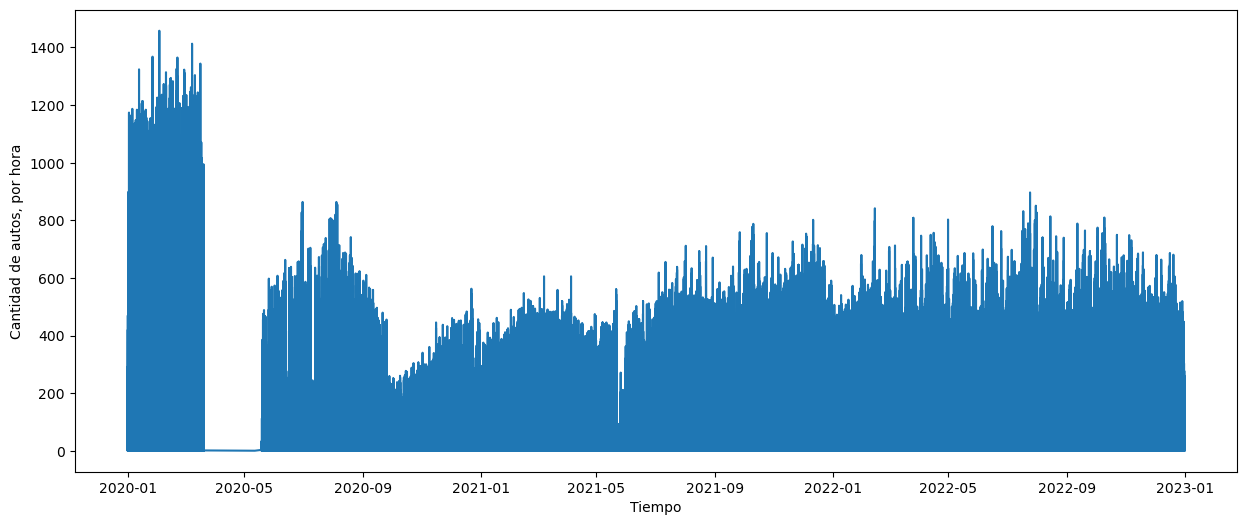

In [696]:
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [699]:
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1096, 3)


,estacion,forma_pago,cantidad_pasos
fecha,,,
2020-01-01,ILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAI...,EfectivoEfectivoEfectivoEfectivoEfectivoEfecti...,21395
2020-01-02,ILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAI...,EfectivoEfectivoEfectivoEfectivoEfectivoEfecti...,33722
2020-01-03,ILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAI...,EfectivoEfectivoEfectivoEfectivoEfectivoEfecti...,37067
2020-01-04,ILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAI...,EfectivoEfectivoEfectivoEfectivoEfectivoEfecti...,30627
2020-01-05,ILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAI...,EfectivoEfectivoEfectivoEfectivoEfectivoEfecti...,27812


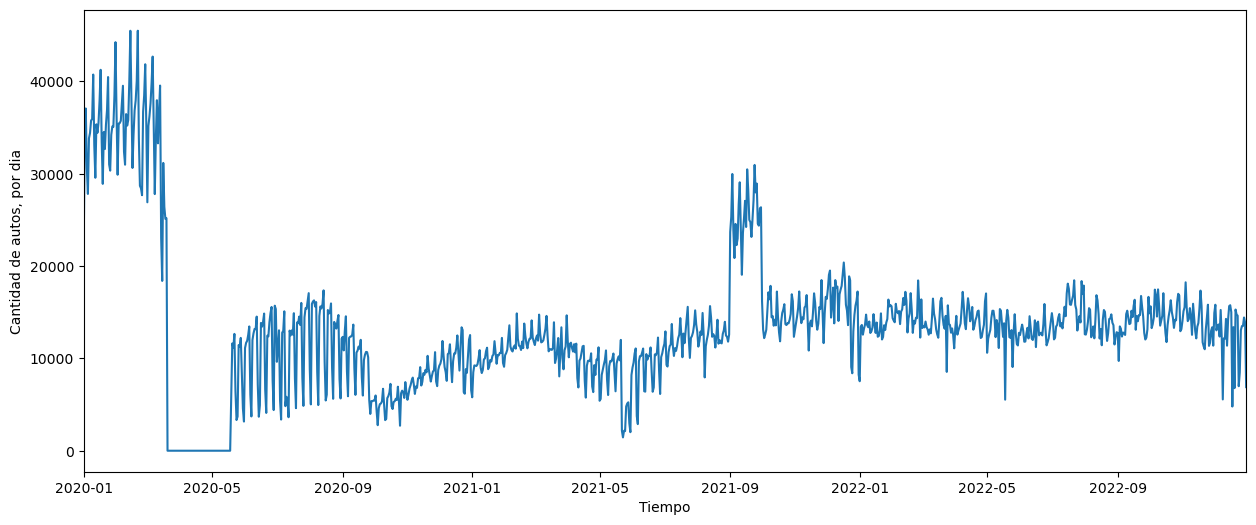

In [702]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlim(datetime.date(2020,1,1), datetime.date(2022,12,31))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

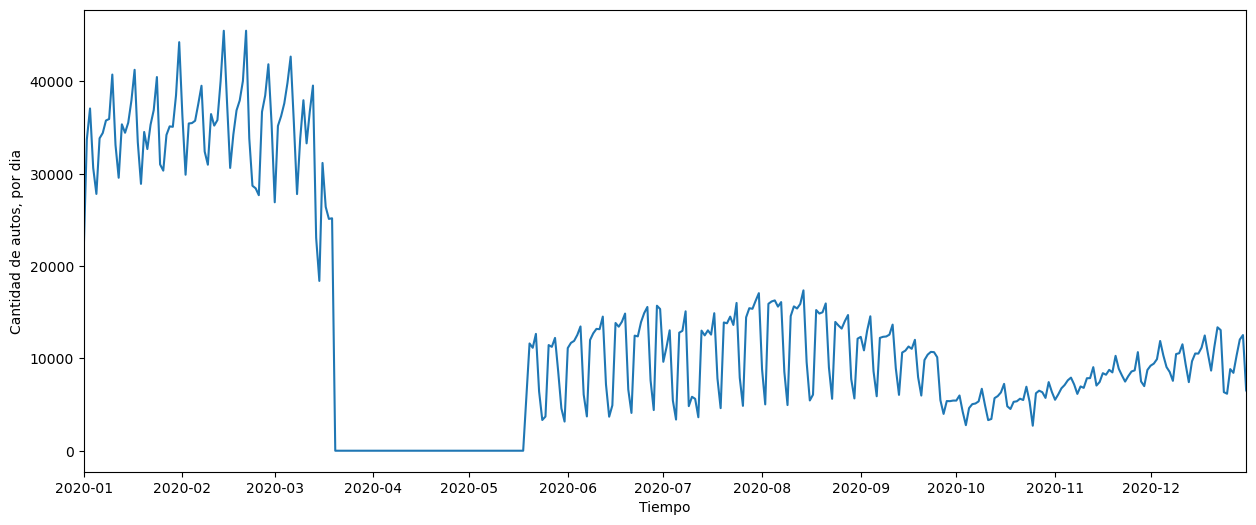

In [704]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlim(datetime.date(2020,1,1), datetime.date(2020,12,31))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

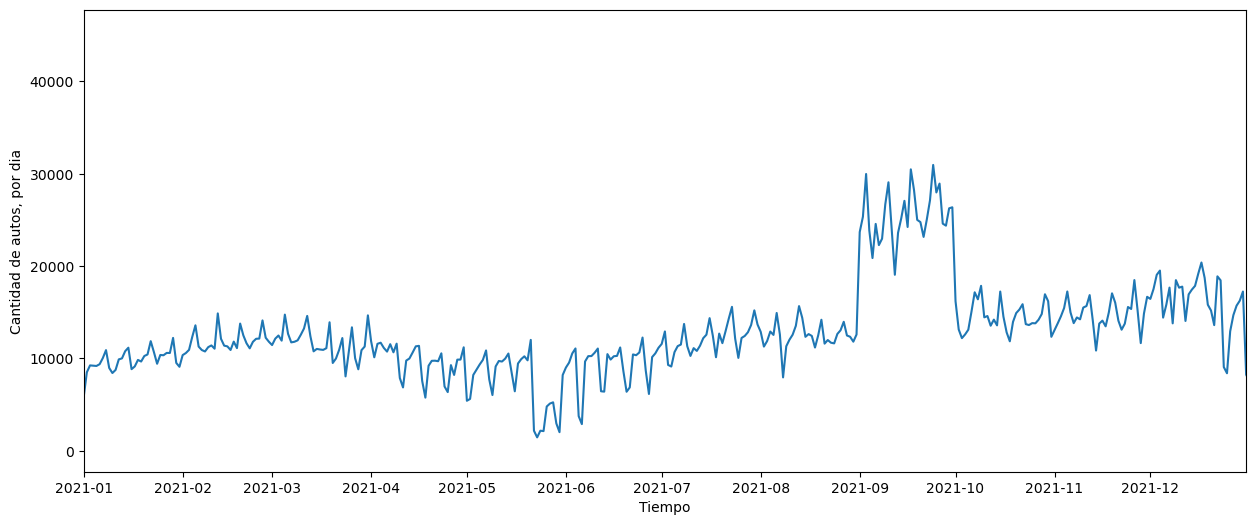

In [706]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlim(datetime.date(2021,1,1), datetime.date(2021,12,31))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [ ]:
#detectamos outliers claros en el mes de Septiembre de 2021.

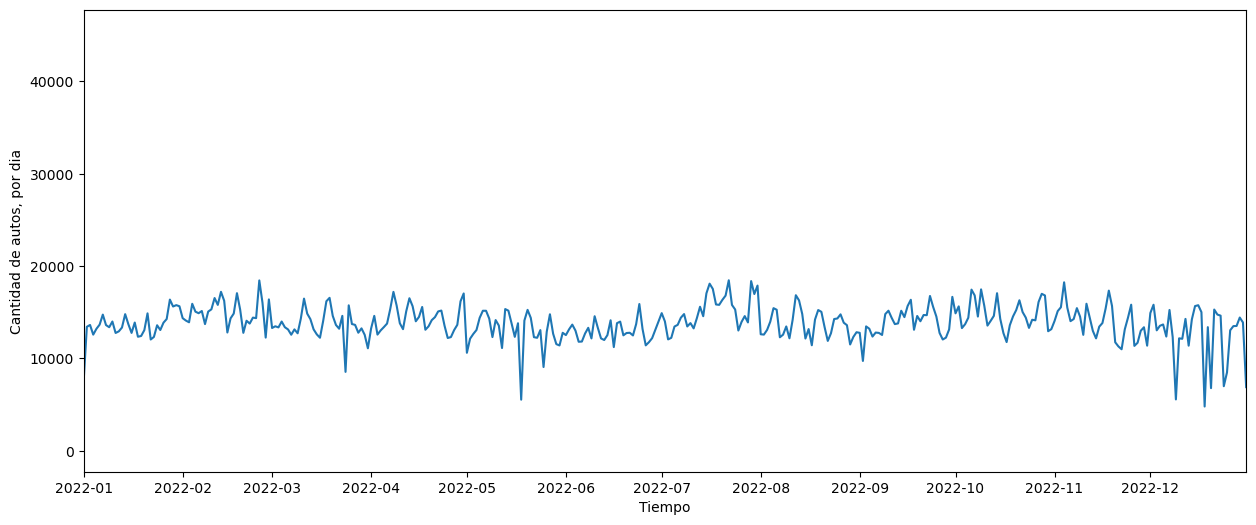

In [708]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlim(datetime.date(2022,1,1), datetime.date(2022,12,31))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [714]:
dataset.describe()

,cantidad_pasos,fecha
count,167440.000000,167440
mean,87.459956,2021-07-21 04:37:48.425704448
min,1.000000,2020-01-01 00:00:00
25%,2.000000,2020-10-21 11:00:00
50%,10.000000,2021-08-19 20:00:00
75%,60.000000,2022-04-26 19:00:00
max,1458.000000,2022-12-31 20:00:00
std,167.467762,NaN


In [719]:
from prophet import Prophet

In [723]:
diario

,estacion,forma_pago,cantidad_pasos
fecha,,,
2020-01-01,ILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAI...,EfectivoEfectivoEfectivoEfectivoEfectivoEfecti...,21395
2020-01-02,ILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAI...,EfectivoEfectivoEfectivoEfectivoEfectivoEfecti...,33722
2020-01-03,ILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAI...,EfectivoEfectivoEfectivoEfectivoEfectivoEfecti...,37067
2020-01-04,ILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAI...,EfectivoEfectivoEfectivoEfectivoEfectivoEfecti...,30627
2020-01-05,ILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAI...,EfectivoEfectivoEfectivoEfectivoEfectivoEfecti...,27812
...,...,...,...
2022-12-27,ILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAI...,EfectivoEfectivoEfectivoEfectivoEfectivoEfecti...,13496
2022-12-28,ILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAI...,EfectivoEfectivoEfectivoEfectivoEfectivoEfecti...,13512
2022-12-29,ILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAI...,EfectivoEfectivoEfectivoEfectivoEfectivoEfecti...,14426


In [733]:
df = diario.reset_index()
df.rename(columns = {'fecha':'ds', 'cantidad_pasos':'y'}, inplace = True)
df

,ds,y
0,2020-01-01,21395
1,2020-01-02,33722
2,2020-01-03,37067
3,2020-01-04,30627
4,2020-01-05,27812
...,...,...
1091,2022-12-27,13496
1092,2022-12-28,13512
1093,2022-12-29,14426
1094,2022-12-30,13888


In [737]:
m = Prophet()
m.fit(df)

21:17:03 - cmdstanpy - INFO - Chain [1] start processing
21:17:03 - cmdstanpy - INFO - Chain [1] done processing


In [740]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1456,2023-12-27
1457,2023-12-28
1458,2023-12-29
1459,2023-12-30
1460,2023-12-31


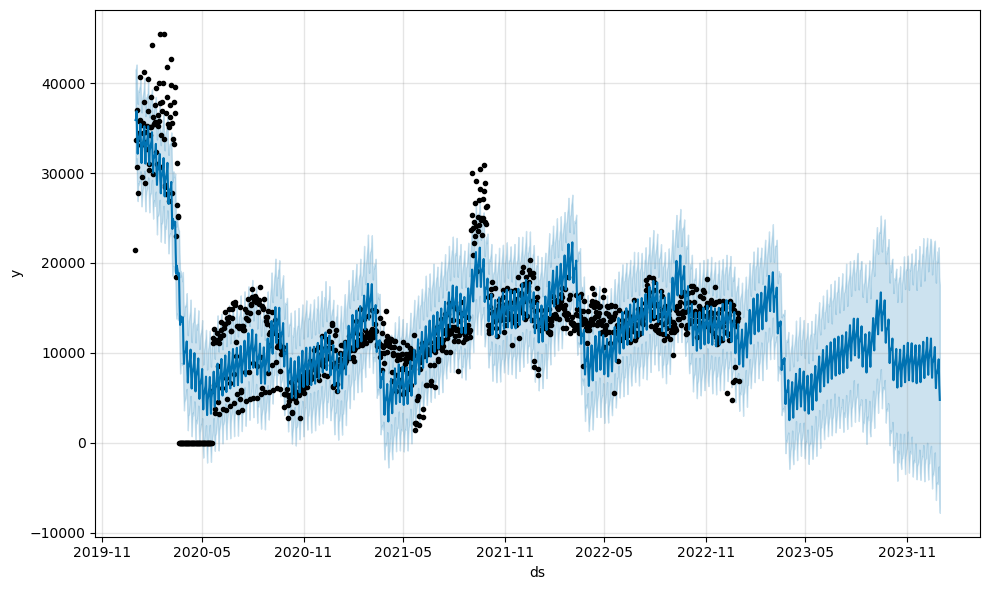

In [743]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

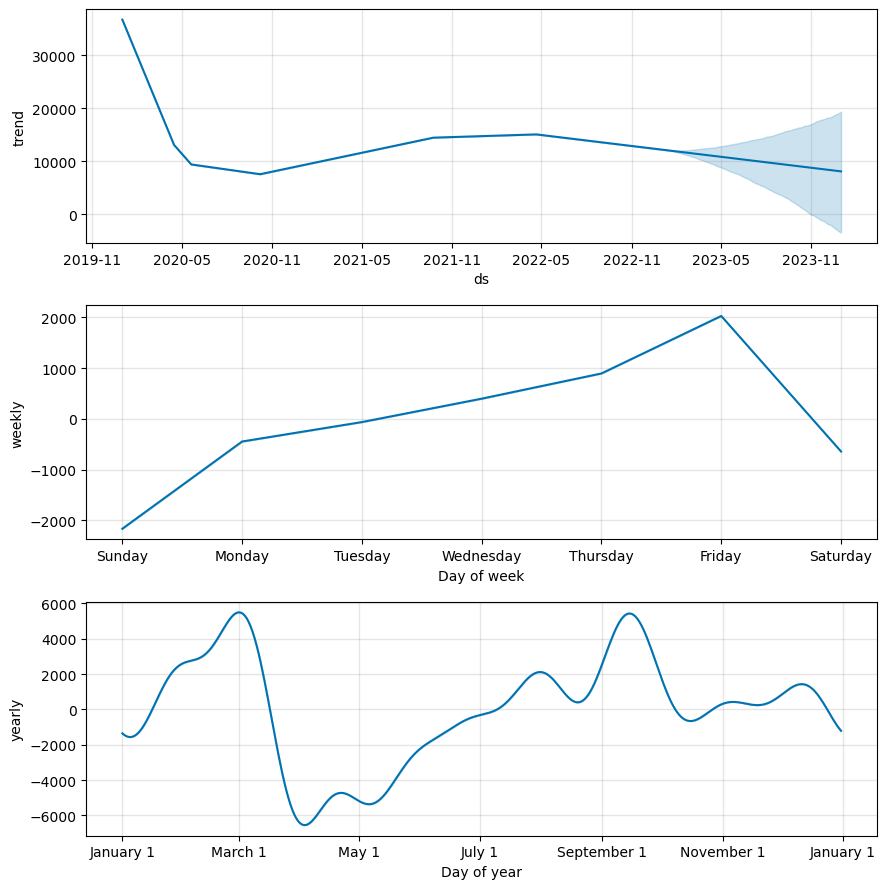

In [747]:
fig2 = m.plot_components(forecast)